Import Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import skimage as skm


Reading images Bands from the directory of your PC

In [2]:
blue = skm.io.imread(r'C:\Users\1930746369\Desktop\rs_python\Landsat\Blue.tif')
green = skm.io.imread(r'C:\Users\1930746369\Desktop\rs_python\Landsat\Green.tif')
red = skm.io.imread(r'C:\Users\1930746369\Desktop\rs_python\Landsat\Red.tif')
nir = skm.io.imread(r'C:\Users\1930746369\Desktop\rs_python\Landsat\NIR.tif')

For further analysis, we should be aware of the dimension and type of the dataset.  It also needs to change type of our data to numpy array for further analysis.Notably, we change our data number to float. So, the following commands will be run:

In [11]:

print('shape of the band: ',blue.shape)
print('type of the band: ',blue.dtype)
B1 = np.array(blue).astype(float)
B2 = np.array(green).astype(float)
B3 = np.array(red).astype(float)
B4 = np.array(nir).astype(float)
print('B1=',B1)

shape of the band:  (998, 998)
type of the band:  int16
B1= [[-64. -71. -76. ... 176. 174. 175.]
 [-57. -34. -59. ... 178. 173. 174.]
 [-40.  -3. -83. ... 176. 173. 173.]
 ...
 [154. 137. 175. ... 432. 418. 456.]
 [179. 143. 205. ... 454. 379. 311.]
 [188. 169. 201. ... 305. 185.  70.]]


If you want to read all the images from a diecory altogether, use imread_Collection instead:

In [12]:
landsat = skm.io.imread_collection(r'C:\Users\1930746369\Desktop\rs_python\Landsat\*.tif')

To illustrate and image you cam use matplotlib package, However, you should make a stack of bands to create a RGB composition. np.stack is a command to ceate a stack of bands

In [14]:
stack = np.stack([B4,B3,B2],axis = 2)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


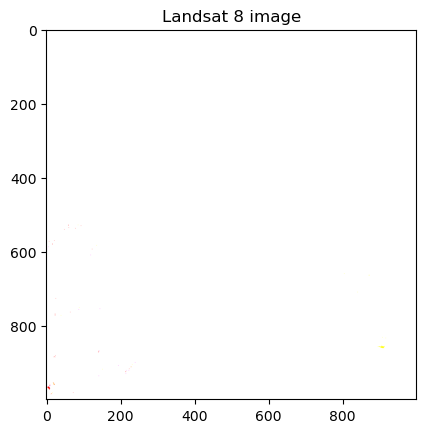

In [15]:
plt.imshow(stack)
plt.title('Landsat 8 image')
plt.show()

Oops! As you can see, we got an error. This happens because the range of data in each pixel shoul be between [0,1] or [0,255] to make RGB image based on bands composition. So we must noralize band values in order to be able to stack images.

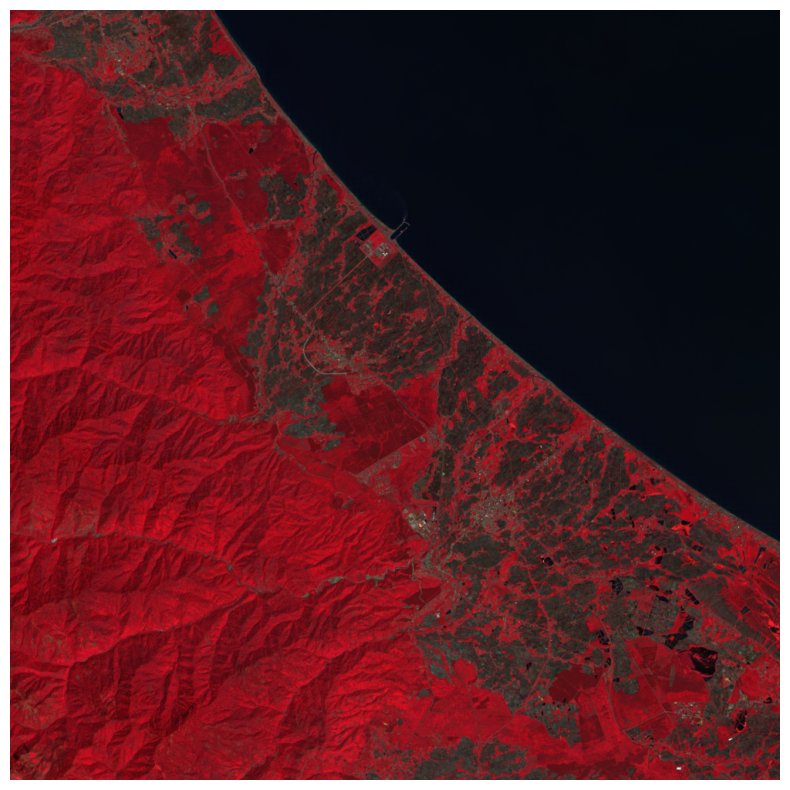

In [16]:
NB4 = (B4-np.min(B4))/(np.max(B4)-np.min(B4))
NB3 = (B3-np.min(B3))/(np.max(B3)-np.min(B3))
NB2 = (B2-np.min(B2))/(np.max(B2)-np.min(B2))
NB1 = (B1-np.min(B1))/(np.max(B1)-np.min(B1))
#Stacking the normalized bands
Nstack = np.stack([NB4,NB3,NB2],axis=2)
#Plot 
plt.figure(figsize=(10,10))
plt.imshow(Nstack)
plt.axis('off')
plt.show()